In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = (12,5) #Adjust configuration of created plots

In [3]:
#load data into dataframe movies
movies = pd.read_csv('movies.csv')

In [4]:
#view dataframe
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Cleaning the data

In [21]:
#make a copy of original dataframe
movie = movies.copy()

In [29]:
#check shape of the original dataframe
movies.shape

(7668, 15)

In [23]:
#checking for null values
movie.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [25]:
#drop missing columns
movie.dropna(inplace = True)

In [27]:
#check to see if columns were dropped
movie.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [30]:
#check for new shape after dropping null columns
movie.shape

(5421, 15)

In [31]:
#check to see if columns are of the right datatypes
movie.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
#change the budget and gross columns to the int datatype
movie.budget = movie.budget.astype(int)
movie.gross = movie.gross.astype(int)

In [66]:
#check to see if columns where converted to the right datatype
movie.dtypes

name                object
rating              object
genre               object
score              float64
votes              float64
director            object
writer              object
star                object
budget               int32
gross                int32
company             object
runtime            float64
release_month       object
release_year         int32
release_country     object
dtype: object

In [34]:
#split the released column into release_month,release_year and release_country columns
movie['release_month'] = movie.released.str.extract('(^[A-Z][a-z]+)')
movie['release_year'] = movie.released.str.extract('(\d{4})'))
movie['release_country'] = movie.released.str.extract('\(([^)]+)\)')

In [37]:
#check to see if columns were successfully created
movie.sample()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_year,release_country
3292,The Horse Whisperer,PG-13,Drama,1998,"May 15, 1998 (United States)",6.6,40000.0,Robert Redford,Nick Evans,Robert Redford,United States,60000000,186883563,Touchstone Pictures,169.0,May,1998,United States


In [39]:
#drop the released, country, year columns since they aren't needed anymore
movie.drop(['released','country','year'],axis = 1, inplace = True)

In [40]:
#check to see if they were dropped
movie.sample(5)

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,release_month,release_year,release_country
4399,Latter Days,R,Comedy,7.0,17000.0,C. Jay Cox,C. Jay Cox,Wes Ramsey,850000,865028,Funny Boy Films,107.0,July,2004,Israel
4517,The Perfect Score,PG-13,Comedy,5.7,24000.0,Brian Robbins,Marc Hyman,Scarlett Johansson,40000000,10898337,Paramount Pictures,93.0,January,2004,United States
6249,Grown Ups 2,PG-13,Comedy,5.4,144000.0,Dennis Dugan,Fred Wolf,Adam Sandler,80000000,246984278,Columbia Pictures,101.0,July,2013,United States
5184,The Messengers,PG-13,Drama,5.4,39000.0,Danny Pang,Mark Wheaton,Dylan McDermott,16000000,55060212,Screen Gems,90.0,February,2007,United States
899,SpaceCamp,PG,Adventure,5.7,13000.0,Harry Winer,Clifford Green,Kate Capshaw,18000000,9697739,ABC Motion Pictures,107.0,June,1986,United States


In [43]:
pd.set_option('display.max_rows',None)

In [46]:
#check for duplicated rows
movie.duplicated().sum()

0

### Visualization

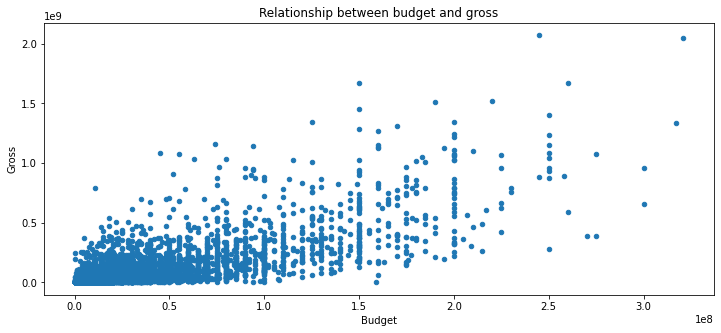

In [55]:
#checking for correlation bretween the budget and the gross columns with the aid of a scatterplot
plt.scatter(data = movie, x = 'budget', y  = 'gross', s = 20)
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.title("Relationship between budget and gross");

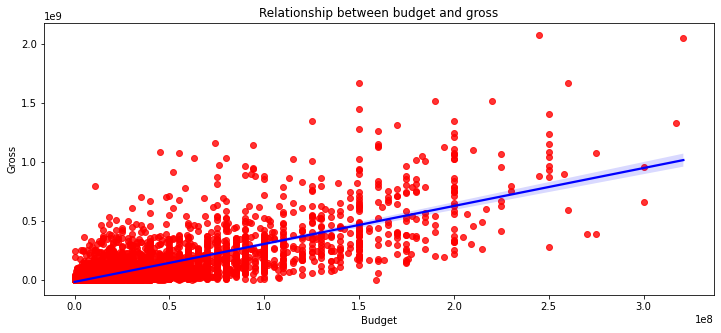

In [62]:
#scatterplot using seaborns regplot
sb.regplot(data = movie, x = 'budget', y  = 'gross', scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.title("Relationship between budget and gross");

In [69]:
correlation_matrix = movie.corr()

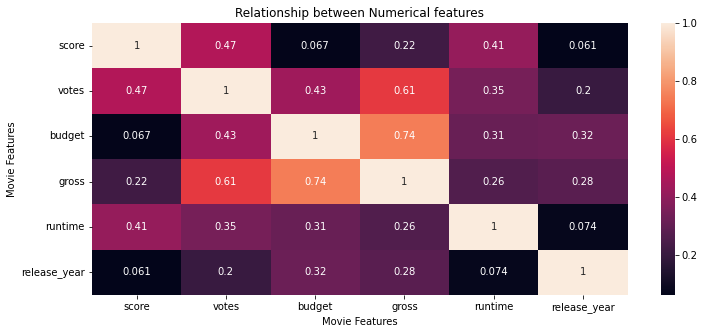

In [71]:
#using a heatmap to show correlation between all the numerical values in the data frame
sb.heatmap(correlation_matrix, annot = True)
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.title("Relationship between Numerical features");